# Fazer um merge para criar um arquivo shp só com TODAS as cidades da RIDE

In [ ]:
# Imports
!pip install geopandas
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import geopandas as gpd
pd.set_option("display.max_rows", 3000)

In [191]:
# Carregar limite da RIDE DF
lim = gpd.read_file('/content/drive/My Drive/PIBITI - 2019/DadosTratamento/DadosShp/Shapes_RIDE_DF/limite_ride_df.shp')

In [192]:
# Carregando shp do DF
bsb = gpd.read_file('/content/drive/My Drive/PIBITI - 2019/DadosTratamento/DadosShp/Shapes_RIDE_DF/rm_ride_df_udh.shp')

In [193]:
bsb.groupby('NM_MUNICIP').head(1)

,UDH_ATLAS,REGIONAL,CD_GEOCODM,NM_MUNICIP,geometry
0,1530010800001,353001010,5300108,BRASÍLIA,"POLYGON ((-48.11521 -15.83216, -48.11528 -15.8..."
233,1310930300001,None,3109303,BURITIS,"POLYGON ((-46.24826 -15.60454, -46.24828 -15.6..."
234,1317040400001,None,3170404,UNAÍ,"POLYGON ((-46.89584 -16.35869, -46.89686 -16.3..."
251,1520010000001,None,5200100,ABADIÂNIA,"POLYGON ((-48.40991 -16.28383, -48.41010 -16.2..."
252,1520017500001,None,5200175,ÁGUA FRIA DE GOIÁS,"POLYGON ((-47.47221 -14.80512, -47.47340 -14.8..."
253,1520025800001,None,5200258,ÁGUAS LINDAS DE GOIÁS,"POLYGON ((-48.21078 -15.71986, -48.21080 -15.7..."
262,1520030800001,None,5200308,ALEXÂNIA,"POLYGON ((-48.32024 -16.29943, -48.32102 -16.3..."
263,1520400300001,None,5204003,CABECEIRAS,"POLYGON ((-46.80500 -15.86571, -46.80620 -15.8..."
264,1520549700002,None,5205497,CIDADE OCIDENTAL,"POLYGON ((-47.67707 -16.06944, -47.67782 -16.0..."
271,1520551300001,None,5205513,COCALZINHO DE GOIÁS,"POLYGON ((-48.25202 -15.65920, -48.27172 -15.6..."


In [1]:
# Todos os municipios de GO
municipios_go = gpd.read_file('/content/drive/My Drive/PIBITI - 2019/DadosTratamento/DadosShp/go_municipios/52MUE250GC_SIR.shp')
municipios_go.shape


NameError: name 'gpd' is not defined

In [196]:
municipios_go.head()
municipios_go[municipios_go.NM_MUNICIP ==  "SÃO JOÃO D'ALIANÇA"]

,NM_MUNICIP,CD_GEOCMU,geometry
62,SÃO JOÃO D'ALIANÇA,5220009,"POLYGON ((-47.66011 -14.70660, -47.66176 -14.7..."


In [197]:
# Todos os municipios de MG
municipios_mg = gpd.read_file('/content/drive/My Drive/PIBITI - 2019/DadosTratamento/DadosShp/mg_municipios/31MUE250GC_SIR.shp')
municipios_mg.shape

(853, 3)

In [198]:
municipios_mg.head()

,NM_MUNICIP,CD_GEOCMU,geometry
0,SÃO JOSÉ DA BARRA,3162948,"POLYGON ((-46.34131 -20.67686, -46.34116 -20.6..."
1,SANTA MARIA DO SALTO,3158102,"POLYGON ((-40.21548 -16.30774, -40.21548 -16.3..."
2,BURITIS,3109303,"POLYGON ((-46.54386 -15.06388, -46.54275 -15.0..."
3,ALPERCATA,3101805,"POLYGON ((-41.95896 -18.95305, -41.95688 -18.9..."
4,RIO PRETO,3155900,"POLYGON ((-43.94209 -22.02820, -43.94233 -22.0..."


### Adicionando as cidades que faltam

In [199]:
#Criando um dataframe com algumas cidades especificas
cidades_faltantes = ["ÁGUA FRIA DE GOIÁS","ARINOS", "ALTO PARAÍSO DE GOIÁS", "ALVORADA DO NORTE", "BARRO ALTO", "CAVALCANTE",
"GOIANÉSIA", "NIQUELÂNDIA","SÃO JOÃO D'ALIANÇA", "SIMOLÂNDIA", "VILA PROPÍCIO","FLORES DE GOIÁS"]


In [200]:
# Adicionando as cidades que faltam relativo ao estado de GO
cidades = municipios_go[municipios_go['NM_MUNICIP'].isin(cidades_faltantes)]
cidades

,NM_MUNICIP,CD_GEOCMU,geometry
25,ALVORADA DO NORTE,5200803,"POLYGON ((-46.49849 -14.48134, -46.49844 -14.4..."
33,NIQUELÂNDIA,5214606,"POLYGON ((-49.01486 -14.53729, -49.01492 -14.5..."
62,SÃO JOÃO D'ALIANÇA,5220009,"POLYGON ((-47.66011 -14.70660, -47.66176 -14.7..."
99,ÁGUA FRIA DE GOIÁS,5200175,"POLYGON ((-48.05199 -14.98334, -48.05199 -14.9..."
111,GOIANÉSIA,5208608,"POLYGON ((-49.35504 -15.32814, -49.35587 -15.3..."
123,BARRO ALTO,5203203,"POLYGON ((-48.97404 -14.89215, -48.95506 -14.8..."
124,FLORES DE GOIÁS,5207907,"POLYGON ((-47.09579 -14.55462, -47.09479 -14.5..."
132,CAVALCANTE,5205307,"POLYGON ((-47.95880 -13.85441, -47.95949 -13.8..."
157,ALTO PARAÍSO DE GOIÁS,5200605,"POLYGON ((-47.74163 -14.09850, -47.73985 -14.0..."
194,VILA PROPÍCIO,5222302,"POLYGON ((-48.91463 -15.20939, -48.91462 -15.2..."


In [201]:
cidades = cidades.append(municipios_mg[municipios_mg['NM_MUNICIP'].isin(cidades_faltantes)])

In [202]:
cidades

,NM_MUNICIP,CD_GEOCMU,geometry
25,ALVORADA DO NORTE,5200803,"POLYGON ((-46.49849 -14.48134, -46.49844 -14.4..."
33,NIQUELÂNDIA,5214606,"POLYGON ((-49.01486 -14.53729, -49.01492 -14.5..."
62,SÃO JOÃO D'ALIANÇA,5220009,"POLYGON ((-47.66011 -14.70660, -47.66176 -14.7..."
99,ÁGUA FRIA DE GOIÁS,5200175,"POLYGON ((-48.05199 -14.98334, -48.05199 -14.9..."
111,GOIANÉSIA,5208608,"POLYGON ((-49.35504 -15.32814, -49.35587 -15.3..."
123,BARRO ALTO,5203203,"POLYGON ((-48.97404 -14.89215, -48.95506 -14.8..."
124,FLORES DE GOIÁS,5207907,"POLYGON ((-47.09579 -14.55462, -47.09479 -14.5..."
132,CAVALCANTE,5205307,"POLYGON ((-47.95880 -13.85441, -47.95949 -13.8..."
157,ALTO PARAÍSO DE GOIÁS,5200605,"POLYGON ((-47.74163 -14.09850, -47.73985 -14.0..."
194,VILA PROPÍCIO,5222302,"POLYGON ((-48.91463 -15.20939, -48.91462 -15.2..."


In [203]:
cidades['CD_GEOCODM'] = cidades['CD_GEOCMU']

In [204]:
del cidades['CD_GEOCMU']
cidades

,NM_MUNICIP,geometry,CD_GEOCODM
25,ALVORADA DO NORTE,"POLYGON ((-46.49849 -14.48134, -46.49844 -14.4...",5200803
33,NIQUELÂNDIA,"POLYGON ((-49.01486 -14.53729, -49.01492 -14.5...",5214606
62,SÃO JOÃO D'ALIANÇA,"POLYGON ((-47.66011 -14.70660, -47.66176 -14.7...",5220009
99,ÁGUA FRIA DE GOIÁS,"POLYGON ((-48.05199 -14.98334, -48.05199 -14.9...",5200175
111,GOIANÉSIA,"POLYGON ((-49.35504 -15.32814, -49.35587 -15.3...",5208608
123,BARRO ALTO,"POLYGON ((-48.97404 -14.89215, -48.95506 -14.8...",5203203
124,FLORES DE GOIÁS,"POLYGON ((-47.09579 -14.55462, -47.09479 -14.5...",5207907
132,CAVALCANTE,"POLYGON ((-47.95880 -13.85441, -47.95949 -13.8...",5205307
157,ALTO PARAÍSO DE GOIÁS,"POLYGON ((-47.74163 -14.09850, -47.73985 -14.0...",5200605
194,VILA PROPÍCIO,"POLYGON ((-48.91463 -15.20939, -48.91462 -15.2...",5222302


### Agora vamos juntar o dataframe cidades com o dataframe bsb e então obter os o geodataframe de todas as cidades da RIDE DF e entorno.

In [205]:
bsb = bsb.drop(columns=['UDH_ATLAS','REGIONAL'])
bsb = bsb.append(cidades)


In [207]:
#del bsb['geometry']
bsb.groupby('NM_MUNICIP').head(1)

,CD_GEOCODM,NM_MUNICIP,geometry
0,5300108,BRASÍLIA,"POLYGON ((-48.11521 -15.83216, -48.11528 -15.8..."
233,3109303,BURITIS,"POLYGON ((-46.24826 -15.60454, -46.24828 -15.6..."
234,3170404,UNAÍ,"POLYGON ((-46.89584 -16.35869, -46.89686 -16.3..."
251,5200100,ABADIÂNIA,"POLYGON ((-48.40991 -16.28383, -48.41010 -16.2..."
252,5200175,ÁGUA FRIA DE GOIÁS,"POLYGON ((-47.47221 -14.80512, -47.47340 -14.8..."
253,5200258,ÁGUAS LINDAS DE GOIÁS,"POLYGON ((-48.21078 -15.71986, -48.21080 -15.7..."
262,5200308,ALEXÂNIA,"POLYGON ((-48.32024 -16.29943, -48.32102 -16.3..."
263,5204003,CABECEIRAS,"POLYGON ((-46.80500 -15.86571, -46.80620 -15.8..."
264,5205497,CIDADE OCIDENTAL,"POLYGON ((-47.67707 -16.06944, -47.67782 -16.0..."
271,5205513,COCALZINHO DE GOIÁS,"POLYGON ((-48.25202 -15.65920, -48.27172 -15.6..."


### Função para remover acentos e ç

In [208]:
def corrigir_nomes(nome):
    nome = nome.replace('Í', 'I').replace('Ç', 'C').replace('Á', 'A').replace('Â', 'A').replace('Ã','A').replace('É','E').replace('Ó','O').replace('Ô','O')

    return nome

bsb['NM_MUNICIP'] = bsb['NM_MUNICIP'].apply(corrigir_nomes)

In [209]:
bsb.groupby('NM_MUNICIP').head(1)

,CD_GEOCODM,NM_MUNICIP,geometry
0,5300108,BRASILIA,"POLYGON ((-48.11521 -15.83216, -48.11528 -15.8..."
233,3109303,BURITIS,"POLYGON ((-46.24826 -15.60454, -46.24828 -15.6..."
234,3170404,UNAI,"POLYGON ((-46.89584 -16.35869, -46.89686 -16.3..."
251,5200100,ABADIANIA,"POLYGON ((-48.40991 -16.28383, -48.41010 -16.2..."
252,5200175,AGUA FRIA DE GOIAS,"POLYGON ((-47.47221 -14.80512, -47.47340 -14.8..."
253,5200258,AGUAS LINDAS DE GOIAS,"POLYGON ((-48.21078 -15.71986, -48.21080 -15.7..."
262,5200308,ALEXANIA,"POLYGON ((-48.32024 -16.29943, -48.32102 -16.3..."
263,5204003,CABECEIRAS,"POLYGON ((-46.80500 -15.86571, -46.80620 -15.8..."
264,5205497,CIDADE OCIDENTAL,"POLYGON ((-47.67707 -16.06944, -47.67782 -16.0..."
271,5205513,COCALZINHO DE GOIAS,"POLYGON ((-48.25202 -15.65920, -48.27172 -15.6..."


In [212]:
bsb.groupby('NM_MUNICIP').head(1)

,CD_GEOCODM,NM_MUNICIP,geometry
0,5300108,BRASILIA,"POLYGON ((-48.11521 -15.83216, -48.11528 -15.8..."
233,3109303,BURITIS,"POLYGON ((-46.24826 -15.60454, -46.24828 -15.6..."
234,3170404,UNAI,"POLYGON ((-46.89584 -16.35869, -46.89686 -16.3..."
251,5200100,ABADIANIA,"POLYGON ((-48.40991 -16.28383, -48.41010 -16.2..."
252,5200175,AGUA FRIA DE GOIAS,"POLYGON ((-47.47221 -14.80512, -47.47340 -14.8..."
253,5200258,AGUAS LINDAS DE GOIAS,"POLYGON ((-48.21078 -15.71986, -48.21080 -15.7..."
262,5200308,ALEXANIA,"POLYGON ((-48.32024 -16.29943, -48.32102 -16.3..."
263,5204003,CABECEIRAS,"POLYGON ((-46.80500 -15.86571, -46.80620 -15.8..."
264,5205497,CIDADE OCIDENTAL,"POLYGON ((-47.67707 -16.06944, -47.67782 -16.0..."
271,5205513,COCALZINHO DE GOIAS,"POLYGON ((-48.25202 -15.65920, -48.27172 -15.6..."


In [213]:
bsb.to_file('/content/drive/My Drive/PIBITI - 2019/DadosTratamento/DadosShp/cidadesRide.shp')

### Verificando os dados SHP criados

In [214]:
ride = gpd.read_file('/content/drive/My Drive/PIBITI - 2019/DadosTratamento/DadosShp/cidadesRide.shp')

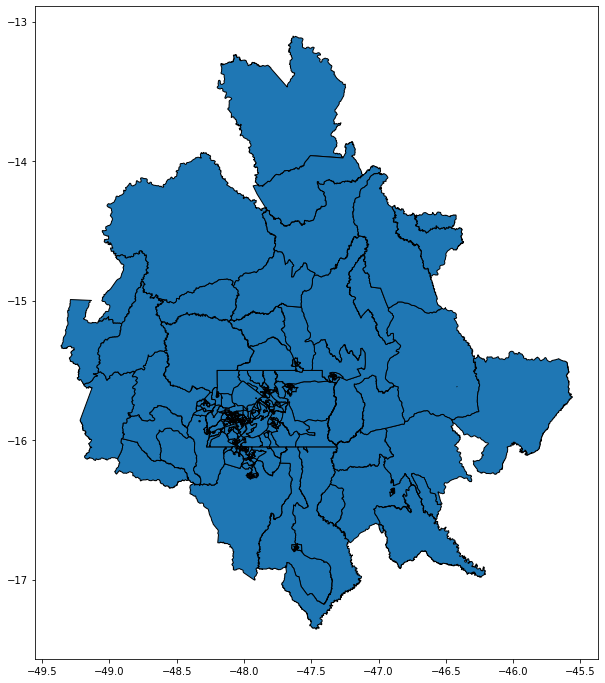

In [219]:
#Visualização
ride.plot(figsize=(14,12),edgecolor='black')
plt.show()